In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
file_path = 'Reviews.csv'
data = pd.read_csv(file_path)

In [13]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
# Data Cleaning

In [15]:
missing_values = data.isnull().sum()

In [17]:
data['Time'] = pd.to_datetime(data['Time'], unit='s')

In [19]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
#🔬 Hypotheses and Questions:

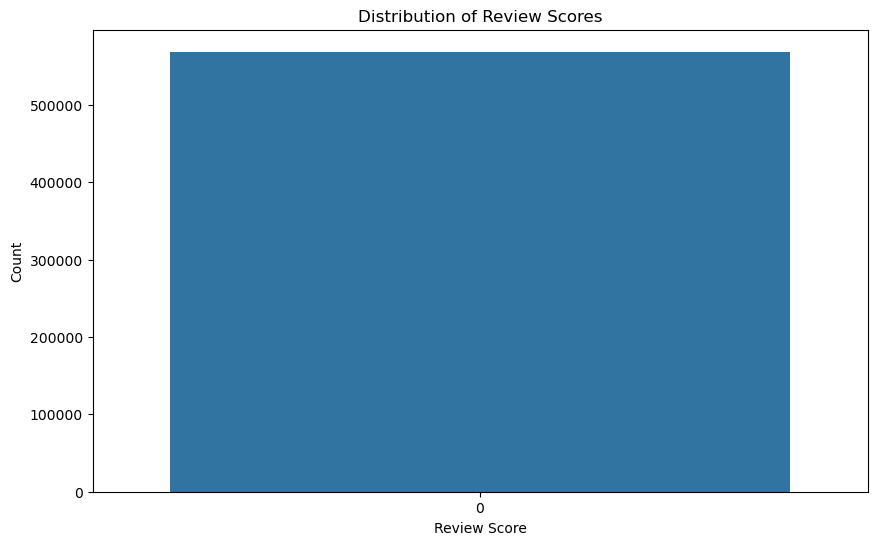

In [64]:
# 1. Review scores are generally positive:

plt.figure(figsize=(10, 6))
sns.countplot(data['Score'])
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

In [ ]:
# 2. Helpful reviews are often marked as such by many users:

In [49]:
helpfulness_ratio = data['HelpfulnessNumerator'] / data['HelpfulnessDenominator']
helpfulness_ratio = helpfulness_ratio.fillna(0)

C:\Users\manjh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


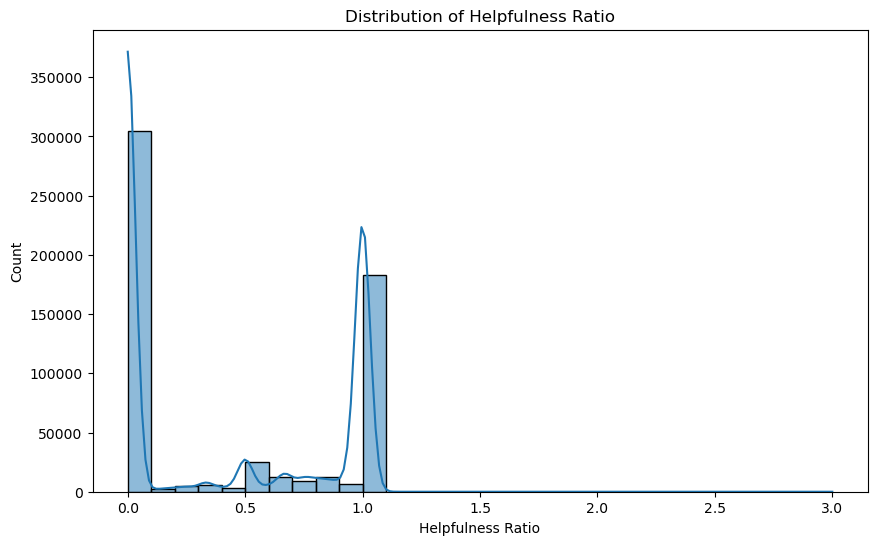

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(helpfulness_ratio, bins=30, kde=True)
plt.title('Distribution of Helpfulness Ratio')
plt.xlabel('Helpfulness Ratio')
plt.ylabel('Count')
plt.show()

In [ ]:
# 3. There are differences in review scores among different products:

In [71]:
product_scores = data.groupby('ProductId')['Score'].mean().sort_values(ascending=False)
top_10_products = product_scores.head(10)

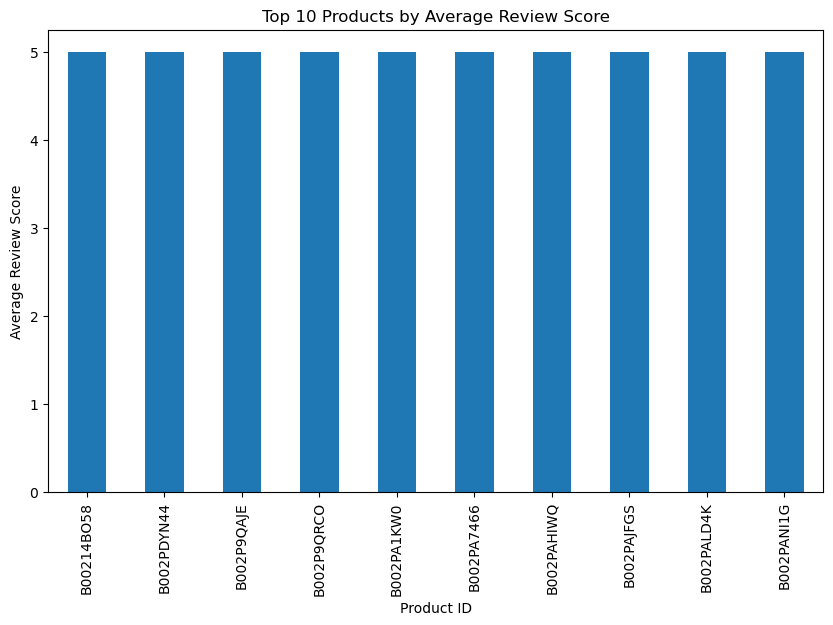

In [73]:
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar')
plt.title('Top 10 Products by Average Review Score')
plt.xlabel('Product ID')
plt.ylabel('Average Review Score')
plt.show()

In [ ]:
# 4. Length of the review text correlates with the review score:

In [75]:
data['ReviewLength'] = data['Text'].apply(len)
correlation = data[['Score', 'ReviewLength']].corr().iloc[0, 1]

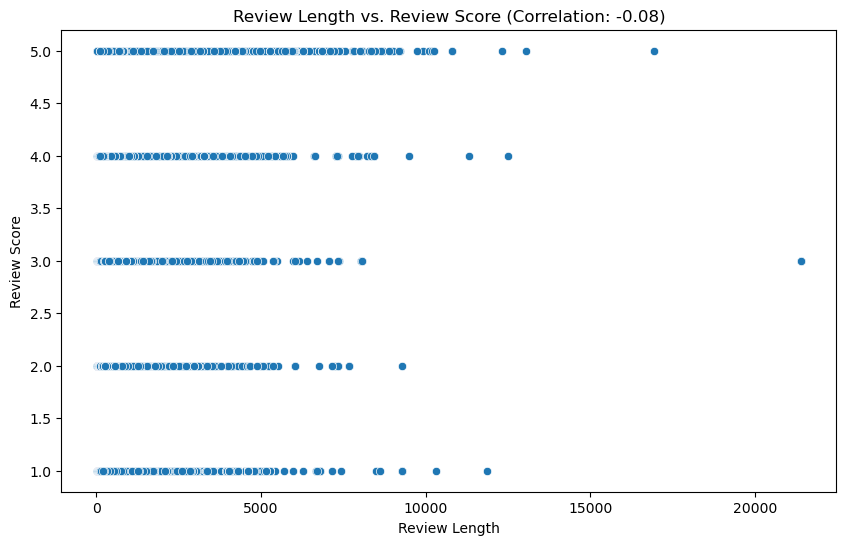

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ReviewLength', y='Score', data=data)
plt.title(f'Review Length vs. Review Score (Correlation: {correlation:.2f})')
plt.xlabel('Review Length')
plt.ylabel('Review Score')
plt.show()

In [ ]:
# 5. Certain users are more active in leaving reviews:

In [79]:
top_10_reviewers = data['UserId'].value_counts().head(10)

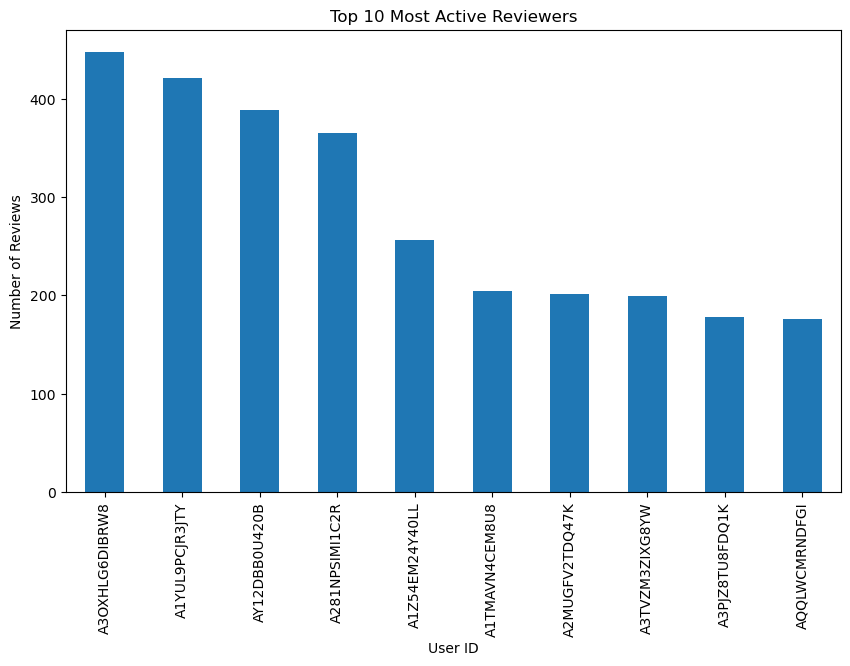

In [81]:
plt.figure(figsize=(10, 6))
top_10_reviewers.plot(kind='bar')
plt.title('Top 10 Most Active Reviewers')
plt.xlabel('User ID')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
# 6. Reviews have become more detailed over time:

In [83]:
data['YearMonth'] = data['Time'].dt.to_period('M')
average_review_length_over_time = data.groupby('YearMonth')['ReviewLength'].mean()

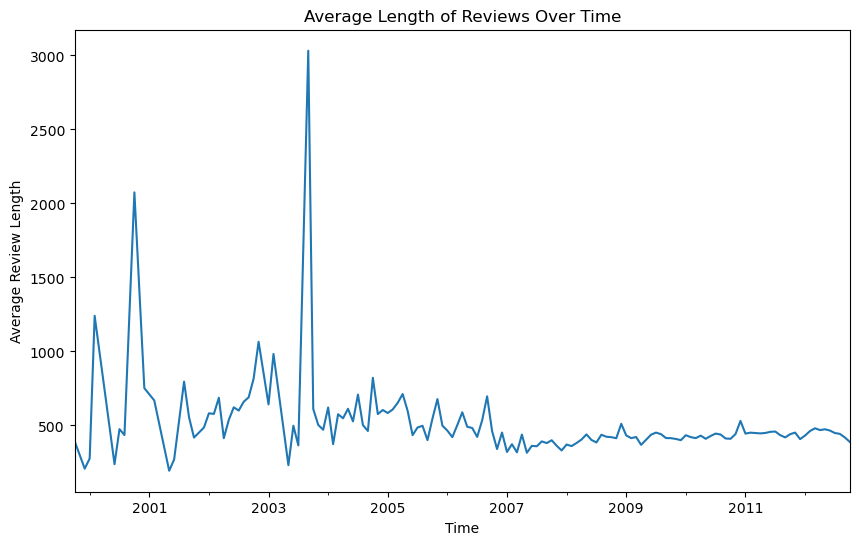

In [85]:
plt.figure(figsize=(10, 6))
average_review_length_over_time.plot()
plt.title('Average Length of Reviews Over Time')
plt.xlabel('Time')
plt.ylabel('Average Review Length')
plt.show()

In [ ]:
# 7. High-rated reviews receive more helpfulness votes:

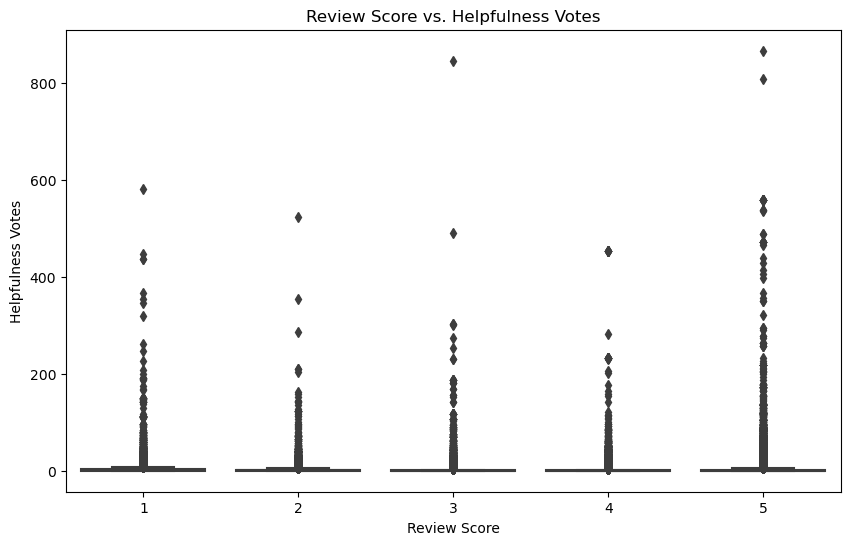

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='HelpfulnessNumerator', data=data)
plt.title('Review Score vs. Helpfulness Votes')
plt.xlabel('Review Score')
plt.ylabel('Helpfulness Votes')
plt.show()

In [ ]:
# 8. Products with more reviews tend to have higher average scores:

In [89]:
product_review_counts = data.groupby('ProductId').size()
product_average_scores = data.groupby('ProductId')['Score'].mean()
correlation_reviews_scores = product_review_counts.corr(product_average_scores)

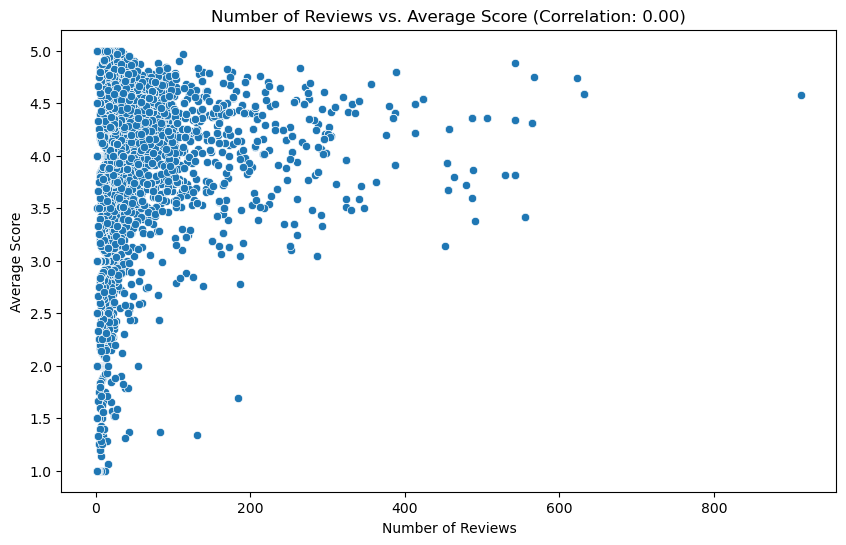

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=product_review_counts, y=product_average_scores)
plt.title(f'Number of Reviews vs. Average Score (Correlation: {correlation_reviews_scores:.2f})')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Score')
plt.show()

In [ ]:
# 9. Negative reviews are often shorter than positive reviews:

In [93]:
negative_reviews = data[data['Score'] < 3]
positive_reviews = data[data['Score'] > 3]

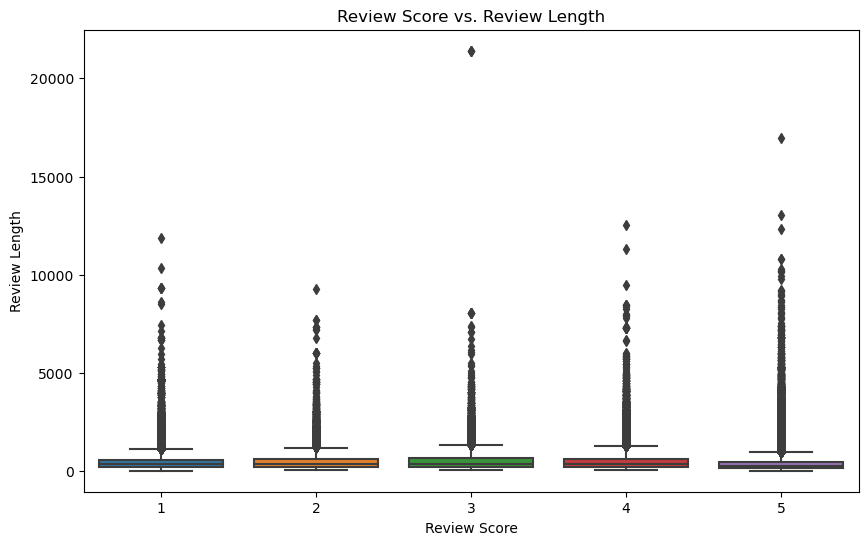

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='ReviewLength', data=data)
plt.title('Review Score vs. Review Length')
plt.xlabel('Review Score')
plt.ylabel('Review Length')
plt.show()

In [ ]:
# 10. Review scores and helpfulness ratios differ across products:

In [97]:
top_10_products_scores = data[data['ProductId'].isin(top_10_products.index)]
top_10_products_helpfulness = top_10_products_scores.groupby('ProductId').apply(lambda x: (x['HelpfulnessNumerator'] / x['HelpfulnessDenominator']).mean())

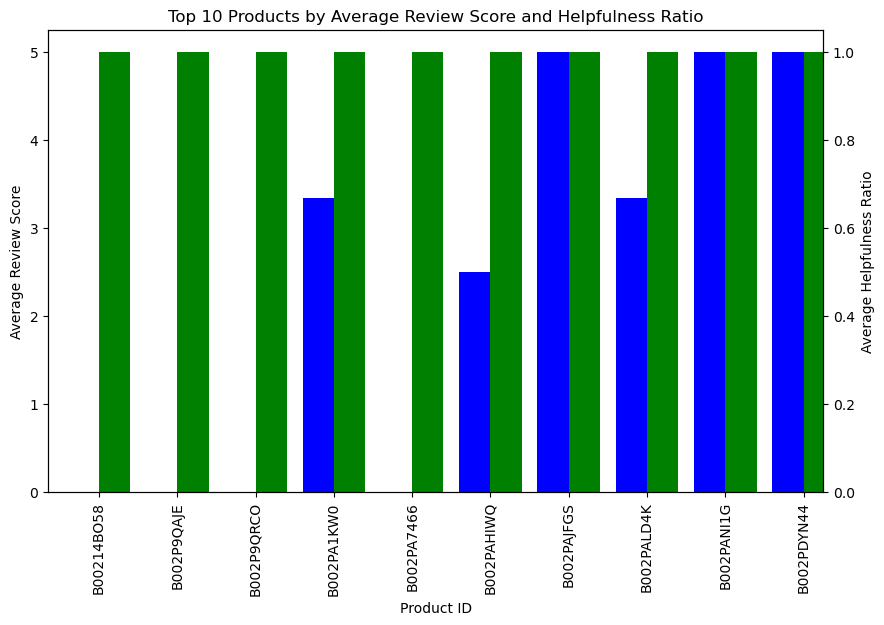

In [106]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
top_10_products_scores.groupby('ProductId')['Score'].mean().plot(kind='bar', ax=ax1, color='g', position=0, width=0.4)
top_10_products_helpfulness.plot(kind='bar', ax=ax2, color='b', position=1, width=0.4)

ax1.set_ylabel('Average Review Score')
ax2.set_ylabel('Average Helpfulness Ratio')
ax1.set_xlabel('Product ID')
plt.title('Top 10 Products by Average Review Score and Helpfulness Ratio')
plt.show()